If there is one common theme across all the notebooks in this collection is that of colormaps. **A colormaps is sequence of colors, where each color corresponds to a particular data value or range of values**. Colormaps are essential tools in data visualization by enabling the interpretation of numerical data through color. By assigning specific colors to different data ranges, colormaps can highlight variations, patterns, and anomalies in spatial data. For example, in visualizing soil moisture, a colormap might transition from dark red (dry) to white (average moisture) to dark blue (wet) to illustrate soil moisture levels.

The structure of a colormap is often defined in terms of RGB (Red, Green, Blue), RGBA (Red, Green, Blue, Alpha), or HEX (hexadecimal) color codes. The alpha channel represents the transparency or opacity of the color.

To learn more about colormaps, I suggest checking the [Matplotlib library](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In this tutorial we will learn how to:

- Access predefined colormap from the Matplotlib library
- Convert colors from the RGB to HEX system
- Convert custom color palettes from the HEX to RGB system

In [1]:
# Import modules
import numpy as np
from matplotlib import colors, colormaps


## Pre-defined colormaps

Let's explore how to get a colormap, how to visualize them, how to reverse a colormap, and how to get a reduced version with fewer colors.

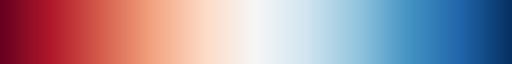

In [9]:
# Divergent colormap good for representing soil moisture conditions
colormaps.get_cmap('RdBu') # Red-Blue


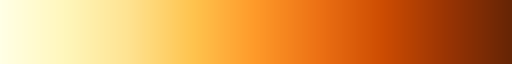

In [8]:
# Increasing colormap good for representing sand or soil organic carbon  
colormaps.get_cmap('YlOrBr') # Yellow-Orange-Brown


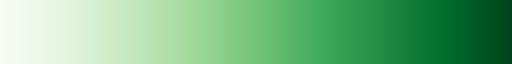

In [53]:
# Monochrome colormaps
colormaps.get_cmap('Greens') # Can also try Reds, Blues


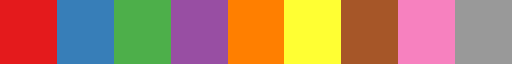

In [12]:
# Discrete colormap good for representing categorical variables,
# like soil textural classes.
colormaps.get_cmap('Set1')


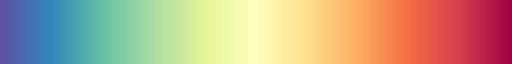

In [15]:
# Reverse a colormap with "_r" (run code again removing "_r")
colormaps.get_cmap('Spectral_r')


In [20]:
# Get number of colors in colormap
print(colormaps.get_cmap('Spectral').N)


256


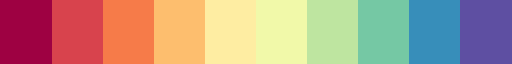

In [19]:
# Resample to select fewer colors
colormaps.get_cmap('Spectral').resampled(10)


In [29]:
# Access single color

# First save the colormap into a variable
cmap = colormaps.get_cmap('Spectral').resampled(10)

# Explore cmap data type (note that this is not a list)
print(type(cmap))

# Access the first color
print(cmap(0))

# Access the fifth color
print(cmap(4))

# Access the last color
print(cmap(cmap.N))


<class 'matplotlib.colors.LinearSegmentedColormap'>
(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
(0.9978213507625272, 0.9324618736383442, 0.6357298474945533, 1.0)
(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)


Note that the outputs of the colormap are on a scale of 0 to 1 rather than on a scale 0 to 255. Representing RGB colors using the 0 to 1 scale enables a more precise specification of color values, simpler calculations for gradients and blending of colors, compatibility with libraries, and a more intuitive represention of the scale of a given color (easier to understand that 0 to 1 than 0 to 255).

## RGB to HEX

As mentioned earlier, we need to pass colormaps in the HEX system to GEE. Let's practice this.

In [32]:
# Get colormap from Matplotlib
rgb_cmap = colormaps.get_cmap('magma')

# Define number of colors 
n = 7 # Use rgb_cmap.N for all the colors

# Split the cmap "n" colors. Here we create the index values
rgb_index = np.linspace(0, rgb_cmap.N-1, n).astype(int)

# Create a list of HEX colors
hex_cmap = [colors.rgb2hex(rgb_cmap(k)) for k in rgb_index]

print(hex_cmap)


['#000004', '#2c115f', '#721f81', '#b5367a', '#f1605d', '#feae77', '#fcfdbf']


## Create a helper function 

This will be handy to re-use our code in other tutorials or projects.

In [72]:
# Define function to retrieve colormaps
def get_hex_cmap(name,n=10):
    """
    Function to get list of HEX colors from a Matplotlib colormap.
    """
    rgb_cmap = colormaps.get_cmap(name)
    if n > rgb_cmap.N-1:
        raise ValueError(f"You select {n} colors, but {name} colormap only has {rgb_cmap.N} colors.")
    else:
        rgb_index = np.linspace(0, rgb_cmap.N-1, n).astype(int)
        hex_cmap = [colors.rgb2hex(rgb_cmap(k)) for k in rgb_index]
        return hex_cmap 


In [73]:
# Test function
get_hex_cmap('Set1', n=7)

['#e41a1c', '#377eb8', '#4daf4a', '#ff7f00', '#ffff33', '#a65628', '#999999']

## HEX to RGB colors

This conversion sometimes becomes necessary for leveraging Python libraries, such as Rasterio, to generate local maps. For example, when consulting GEE documentation to construct a vegetation index map, you will probably encounter colormaps specified in HEX format. This assumes the use of GEE's plotting tools. However, to employ the same colormap with alternative Python libraries that operate in the RGB color system, a conversion from HEX to RGB can be useful.

In [64]:
# Paletter of colors for the Enhanced Vegetation Index
hex_palette = ['#FEFEFE','#CE7E45', '#DF923D', '#F1B555', '#FCD163', '#99B718', '#74A901',
             '#66A000', '#529400', '#3E8601', '#207401', '#056201', '#004C00', '#023B01',
             '#012E01', '#011D01', '#011301']

# Use the built-in ListedColormap function to do the conversion
rgb_cmap = colors.ListedColormap(hex_palette)


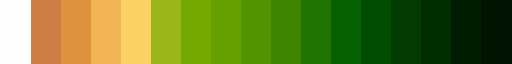

In [65]:
# Display our new colormap
rgb_cmap

## RGB and HEX in more depth

If you made this far, let's delve into the workings of the RGB and HEX color systems for enhanced understanding. The RGB color space specifies colors using three components: red, green, and blue, each varying from 0 to 255, or occasionally from 0 to 1 as demonstrated by Matplotlib's output. 

In contrast, the HEX system employs six-digit hexadecimal numbers preceded by a hash (#), with each digit pair denoting the red, green, and blue components. For example, white is expressed as `(255, 255, 255)` in RGB and `#ffffff` in HEX. Consequently, the RGB system offers 256 intensity levels per component, totaling over 16 million possible colors ($256^3$ = 16.7 million).

Let's look at some examples. Green is depicted as `(0, 255, 0)` or `(0, 1, 0)` in RGB and as `#00ff00` in HEX. Here, `00` signifies the minimum intensity, while `ff` denotes the maximum intensity. So `ff` is equivalent to `255` or `1`. Utilizing ten numeric (0 to 9) and six alphabetic (*a* through *f*) characters results in 16 alphanumeric digits. Given that $\sqrt{256} = 16$, two characters are required to represent 256 combinations, with `00` for `0`, `01` for `1`, and so forth until `fe` for `254`, and `ff` for `255`.

In [71]:
# Recall our description of the HEX system above.
# Show that the first color (index zero) "#FEFEFE" is (254, 254, 254)

print('Scale 0-1:', np.array(rgb_cmap(0)))
print('Scale 0-255:', (np.array(rgb_cmap(0))*255).astype(int))

# The alpha channel does not have any transparency, so it has a value of 1 or 255

Scale 0-1: [0.99607843 0.99607843 0.99607843 1.        ]
Scale 0-255: [254 254 254 255]
